## Analyze A/B Test Results

In this project we analysed a dataset to see if the new page drives more conversions than the old page. To do so, we used the A/B Test methodology.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. 

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [33]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, we read in the `ab_data.csv` data and store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [34]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Find the number of rows in the dataset.

In [35]:
rows = df.shape[0]
print('The number of rows in the dataset is: {}.'.format(rows))

The number of rows in the dataset is: 294478.


c. The number of unique users in the dataset.

In [36]:
unique_users = df['user_id'].nunique()
print('The number of unique users in the dataset is {}.'.format(unique_users))

The number of unique users in the dataset is 290584.


d. The proportion of users converted.

In [37]:
converted_users_prop = df['converted'].mean()
print('The proportion of users converted is: {}.'.format(converted_users_prop.round(2)))

The proportion of users converted is: 0.12.


e. The number of times the `new_page` and `treatment` don't match.

In [38]:
mismatch_cases_treatment = df.query('group == "treatment" and landing_page !="new_page"')
mismatch_cases_control = df.query('group == "control" and landing_page !="old_page"')
# print(mismatch_cases_treatment, mismatch_cases_control)
mismatch_cases = mismatch_cases_treatment.shape[0]+mismatch_cases_control.shape[0]
print("The number of times the new_page and treatment don't match is: {}.".format(mismatch_cases))


The number of times the new_page and treatment don't match is: 3893.


f. Do any of the rows have missing values?

In [39]:
null_data = df[df.isnull().any(axis=1)]
null_data

,user_id,timestamp,group,landing_page,converted


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Create a new dataset that meets our specifications.  Store our new dataframe in **df2**.

In [40]:
df_treatment = df.query('group == "treatment" & landing_page == "new_page"')
df_control = df.query('group == "control" & landing_page == "old_page"')
df2 = pd.concat([df_treatment, df_control])
df2.shape
                  

(290585, 5)

In [41]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions below.

a. How many unique **user_id**s are in **df2**?

In [42]:
unique_user_ids = df2['user_id'].nunique()
print('The number of unique user_ids is: {}.'.format(unique_user_ids))

The number of unique user_ids is: 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [43]:
duplicates = df2[df2.duplicated('user_id', keep=False) == True]
duplicates

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [44]:
row_duplicate = duplicates.index
row_duplicate


Int64Index([1899, 2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [45]:
df2.drop_duplicates('user_id', inplace = True)
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the questions below.

a. What is the probability of an individual converting regardless of the page they receive?

In [46]:
converting_prob = df2['converted'].mean()
print('The probability of an individual converting regardless of the page they receive is: {}.'.
      format(converting_prob.round(4)))

The probability of an individual converting regardless of the page they receive is: 0.1196.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [47]:
control_prob = df2[df2['group'] == 'control']['converted'].mean()
print('The probability of an individual in the control group converting is: {}.'.
      format(control_prob.round(4)))


The probability of an individual in the control group converting is: 0.1204.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [48]:
treatment_prob = df2[df2['group'] == 'treatment']['converted'].mean()
print('The probability of an individual in the treatment group converting is: {}.'.
      format(treatment_prob.round(4)))


The probability of an individual in the treatment group converting is: 0.1188.


d. What is the probability that an individual received the new page?

In [49]:
new_page_prob = (len(df2[df2['landing_page']=='new_page']))/df2.shape[0]
print('The probability of receiving a new page is: {}.'.
     format(new_page_prob))

The probability of receiving a new page is: 0.5000619442226688.


In [50]:
# Calculate the difference in the probability of conversion for the treatment group and the control group

diff_prob = treatment_prob - control_prob
print('The difference in the probabilities of conversion for those who viewed the new page and those who viewed the old page is: {}.'.
     format(diff_prob.round(4)))

The difference in the probabilities of conversion for those who viewed the new page and those who viewed the old page is: -0.0016.


In [51]:
# Calculate the number of days the experiment went for
duration = pd.to_datetime(df2.timestamp.max()) - pd.to_datetime(df2.timestamp.min())
duration

Timedelta('21 days 23:59:49.081927')

e. I will consider my results from parts (a) through (d) above, and explain below whether I think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Conclusion: Given that the probability of converting for those viewing the new page is even slightly less than the probability of converting for those viewing the old page (by -0.0016) and the new page and the old page were shown almost equal number of times, we do not have sufficient evidence to conclude that the new page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do we run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider we need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should our null and alternative hypotheses be?  We can state our hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$: $p_{new}$ - $p_{old}$ <= 0**

**$H_{1}$: $p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We will use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

We will perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

We will use the cells below to provide the necessary parts of this simulation.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [52]:
p_new_ctr = converting_prob
p_new_ctr

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [53]:
p_old_ctr = converting_prob
p_old_ctr

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [54]:
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [55]:
n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [56]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new_ctr, p_new_ctr])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [57]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old_ctr, p_old_ctr])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [58]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.0004934503074575658

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [59]:
new_converted_simulation = np.random.binomial(n_new, p_new_ctr, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old_ctr, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what we expected?

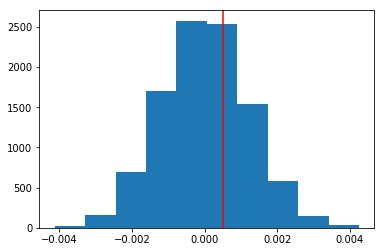

In [60]:
plt.hist(p_diffs);
plt.axvline(x = obs_diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [61]:
actual_diff = treatment_prob - control_prob
p_val = (p_diffs > actual_diff).mean()
actual_diff, p_val

(-0.0015782389853555567, 0.90510000000000002)

k. I will explain using the vocabulary I've learned in this course what we just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We calculated the p-value here, meaning the probability of observing the given statistic if the null hypothesis is true. The p-value is large in this case which tells us that there is enough evidence that the statistic comes from the null hypothesis and so we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Let's fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [62]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control']['converted'].sum()
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [63]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [64]:
# Calculate the critical value (alpha) for the one-side t-test

from scipy.stats import norm
p = 0.95
# retrieve value <= probability
critical_value = norm.ppf(p)
critical_value


1.6448536269514722

n. What do the z-score and p-value we computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score (approx. -1.31) is well below the critical value (approx. 1.64485) for a one-sided t-test for the 95% confidence level and the p-value (approx. 0.905) is very high. These two factors say that there is sufficient evidence that we fail to reject the null hypothesis. This is well in line with the findings we obtained in parts j and k. There is no sufficient evidence that the new page leads to more conversions than the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result we achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we are interested in obtaining a response that has only two outcomes: either converted or not converted, we will perform the logistic regression in this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, we first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  I will add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [65]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate our regression model on the two columns we created in part b., then fit the model using the two columns we created in part **b.** to predict whether or not an individual converts. 

In [66]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of our model below, and use it as necessary to answer the following questions.

In [67]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:41:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [68]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

**In Part II, we obtained the p-value of 0.905, while in Part III the p-value is 0.190. This is explained by the different null and alternative hypotheses we had in Part II compared to Part III. The relationship between the p-values for a two-sided test (0.90) and one-sided test (0.19) comes down to the following: 0.90=1-0.19/2. In both cases we cannot reject the null hypothesis** <br>
<br>
The null and alternative hypotheses for Part II were as follows: <br>

$H_{0}$: $p_{new}$ - $p_{old}$ <= 0

$H_{1}$: $p_{new}$ - $p_{old}$ > 0 <br>
<br>
While the null and alternative hypothese for Part III are: <br>

$H_{0}$: $p_{new}$ - $p_{old}$ = 0

$H_{1}$: $p_{new}$ - $p_{old}$ != 0

f. Now, we are considering other things that might influence whether or not an individual converts.  Let's discuss why it is a good idea to consider other factors to add into our regression model.  Are there any disadvantages to adding additional terms into our regression model?

**Currently, our model takes into account only one factor, namely, the type of group, being either treatment or control. In real life there could be many other factors that affect the outcome, including whether an individual is a new user or an experienced user and how long the experiment was taken for. However, our dataset does not have information on this topic. If we add such factor as landing_page, this might not be of great help since "group" and "landing_page" data are clearly related, which brings the issue of multicollinearity or interdependency of factors. Multicullinearity can worsen the predictability strength of our model.**

g. Now along with testing if the conversion rate changes for different pages, let's also add an effect based on which country a user lives in. I will read in the **countries.csv** dataset and merge together our datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  We will create dummy variables for these country columns - Let's then provide the statistical output as well as a written response to answer this question.

In [69]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [70]:
df2 = df2.join(countries.set_index('user_id'), on = 'user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [71]:
df2['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [72]:
df2[['US', 'CA', 'UK']] = pd.get_dummies(df2['country'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [73]:
logistic_country = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'US', 'CA']])
results_country = logistic_country.fit()
results_country.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        18:41:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
CA             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [77]:
# See how many times the users from US and Canada are more likely to convert than the users from the UK.
1/np.exp(results_country.params)

intercept    7.310207
ab_page      1.015056
US           1.041599
CA           0.990165
dtype: float64

**Given that the coefficients for all countries do not considerably differ from each other and the p-values are all above the critical level of 0.05, there is no statistical evidence to conclude that the country the user is in significantly affects the conversion rate. There is no practical significance in adding countries to make this additional analysis.**

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there are significant effects on conversion.  Let's create the necessary additional columns, and fit the new model.  

I will then provide the summary results, and my conclusions based on the results.

In [78]:
# Create interaction variable for ab_page and US, CA, and UK
for country in ['US', 'CA', 'UK']:
    df2['page_'+country] = df2['ab_page'] * df2[country]
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK,page_US,page_CA,page_UK
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0,0


In [79]:
logit_country_page = sm.Logit(df2['converted'], df2[['intercept','ab_page', 'US', 'CA', 'page_US', 'page_CA']])
results_country_page = logit_country_page.fit()
results_country_page.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        18:43:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
CA            -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_US       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_CA        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [80]:
# See how many times the users from US and Canada are more likely to convert than the users from the UK 
# based on our interaction factors.
1/np.exp(results_country_page.params)

intercept    7.289813
ab_page      1.020776
US           1.017682
CA           1.005761
page_US      1.048001
page_CA      0.969090
dtype: float64

**We can see from the results of the new model accounting for possible interaction between page and country that the p-values for the country-page factor are all above the critical level of 0.05 required to reject the null hypothesis. So there is no statistical evidence to reject the null hypothesis that there is difference in the conversion rate between the new page and the old page. The differences are so minor that suggest that there was no practical significance in adding this additional factor to our analysis.**

<a id='conclusions'></a>
## Conclusions

> In this project we analysed a dataset of a company that is considering launching a new webpage to make more conversions. We performed the analysis in two stages:
- First, we considered the probabilities of converting for users viewing the old page as opposed to users viewing the new page. The resulting difference prompted that the old page was even slightly better performing. There was no evidence for thee company to switch to the new webpage.
- Second, we performed an A/B Test analysis. The results of the A/B Test analysis (p-value - 0.907) also prompted that we did not have statistical evidence to reject the null hypothesis, which was that the old page was performing not worse than the new page.
- Third, we performed a regression analysis. We analysed the influence of the independent factor of page on the response variable - conversion and saw that the p-value was large enough (0.19) to fail to reject the null hypothesis that there was no significant difference in the conversion rates of the two pages. Besides, there was evidence that the users viewing the old page were 1.015 times more likely to convert than the users viewing the new page. 
- We then added additional factors such as country and the interaction between page and country to see if this would make any difference. However, the model showed that there was no statistical evidence to suggest that country affected the conversion rate or that the interaction between the country and page affected the conversion rate.

> It was not practical to add any additional factors, like country or interaction betwen the country and page, in our case. Besides, we did not account for whether the users were existing or new, as user aversion or novelty could affect the conversion rates. To mitigate these factors, we could continue the experiment for a longer time.


In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0